In [1]:
%load_ext autoreload
%autoreload 2

## 0. Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os
%matplotlib inline

In [3]:
# Plotting Parameters
params = {'legend.fontsize': 'x-large',
        'figure.figsize': (15, 5),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


## 1. Plot the `mean` and `stdev` of the corner reflectors for a given `burst_id` per `date`

In [4]:
# Define parameters
save_dir = '/u/trappist-r0/bato/work/cslc_validation/calval_v0.2/ALE/Rosamond/T064_135523_IW2'
burst_id = 't064_135523_iw2'
cr_network = 'Rosamond'


In [5]:
# Summary files
outcsv1 = f'ALE_{cr_network}_{burst_id.upper()}.csv'
outcsv2 = f'ALE_{cr_network}_{burst_id.upper()}_ID.csv'

In [6]:
# Read csv results
df = pd.read_csv(f'{save_dir}/summary/{outcsv1}', sep=',')
del df[df.columns[0]]
df.columns = ['Date','EW_avg','EW_std','NS_avg','NS_std','GRg_avg','GRg_std','Az_avg','Az_std']
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df.head()

,Date,EW_avg,EW_std,NS_avg,NS_std,GRg_avg,GRg_std,Az_avg,Az_std
0,2015-06-19,0.361,0.883,0.651,0.548,-0.473,0.813,0.574,0.647
1,2015-05-02,-1.426,0.374,0.568,0.113,1.300,0.372,0.817,0.120
2,2015-01-14,-1.450,0.201,0.857,0.212,1.271,0.160,1.105,0.244
3,2015-02-07,-1.476,0.321,0.564,0.499,1.349,0.270,0.821,0.528
4,2015-06-07,0.378,0.926,0.527,0.446,-0.468,0.853,0.450,0.575


In [7]:
def if_pass(ts,requirement):
    bool_pass = (ts > -requirement) & (ts < requirement)
    pass_rate = np.count_nonzero(bool_pass)/len(bool_pass)
    return bool_pass, pass_rate, pass_rate>=0.8

In [8]:
# Evaluate if the point is passing the requirement or not
rg_bool_pass, rg_pass_rate, rg_pass_or_not = if_pass(df['GRg_avg'],1.5)
az_bool_pass, az_pass_rate, az_pass_or_not = if_pass(df['Az_avg'],1.5)

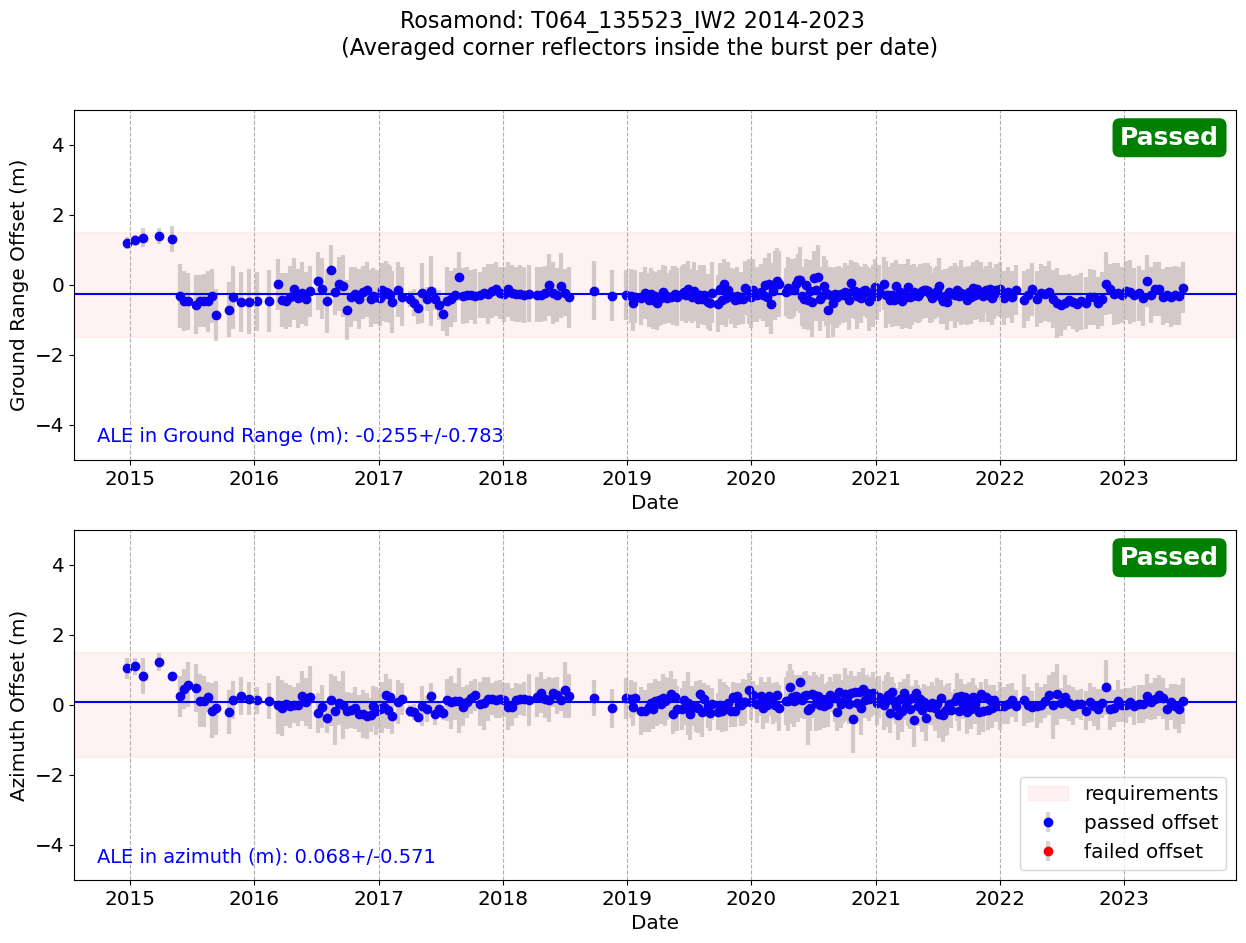

In [9]:
# Plot figure
fig, ax = plt.subplots(2,1,figsize=(15,10))
ax[0].axhspan(-1.5,1.5,color='red', alpha=0.05,label='requirements')    #OPERA requirements in ground range
ax[0].errorbar(df['Date'][rg_bool_pass],df['GRg_avg'][rg_bool_pass],df['GRg_std'][rg_bool_pass],marker='o',color='b',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0,label='passed offset')
ax[0].errorbar(df['Date'][~rg_bool_pass],df['GRg_avg'][~rg_bool_pass],df['GRg_std'][~rg_bool_pass],marker='o',color='r',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0,label='failed offset')
ax[0].set_ylim(-5,5)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Ground Range Offset (m)')
ax[0].grid(axis='x',linestyle='--')
ax[0].axhline(np.round(df.GRg_avg.mean(),3), color='blue')
ax[0].text(0.02,0.05,f"ALE in Ground Range (m): {np.round(df.GRg_avg.mean(),3)}+/-{np.round(df.GRg_std.mean(),3)}",transform = ax[0].transAxes,color='blue',fontsize=14)
if rg_pass_or_not:
    ax[0].text(0.90,0.90,'Passed',color='w',size=18,weight='bold',transform = ax[0].transAxes,bbox=dict(facecolor='green',boxstyle='round',edgecolor='none'))
else:
    ax[0].text(0.90,0.90,'Failed',color='w',size=18,weight='bold',transform = ax[0].transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax[1].axhspan(-1.5,1.5,color='red', alpha=0.05,label='requirements')    #OPERA requirements in azimuth
ax[1].errorbar(df['Date'][az_bool_pass],df['Az_avg'][az_bool_pass],df['Az_std'][az_bool_pass],marker='o',color='b',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0,label='passed offset')
ax[1].errorbar(df['Date'][~az_bool_pass],df['Az_avg'][~az_bool_pass],df['Az_std'][~az_bool_pass],marker='o',color='r',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0,label='failed offset')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Azimuth Offset (m)')
ax[1].set_ylim(-5,5)
ax[1].grid(axis='x',linestyle='--')
ax[1].axhline(np.round(df.Az_avg.mean(),3), color='blue')
if az_pass_or_not:
    ax[1].text(0.90,0.90,'Passed',color='w',size=18,weight='bold',transform = ax[1].transAxes,bbox=dict(facecolor='green',boxstyle='round',edgecolor='none'))
else:
    ax[1].text(0.90,0.90,'Failed',color='w',size=18,weight='bold',transform = ax[1].transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax[1].legend(loc = 'lower right',frameon=True)
ax[1].text(0.02,0.05,f"ALE in azimuth (m): {np.round(df.Az_avg.mean(),3)}+/-{np.round(df.Az_std.mean(),3)}",transform = ax[1].transAxes, color='blue',fontsize=14)
nl = '\n'
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (Averaged corner reflectors inside the burst per date)", fontsize=16)
fig.savefig(f'{save_dir}/pngs/ALE_summary_{cr_network}_{burst_id.upper()}_ts_grazi_mean.png',dpi=300,bbox_inches='tight')

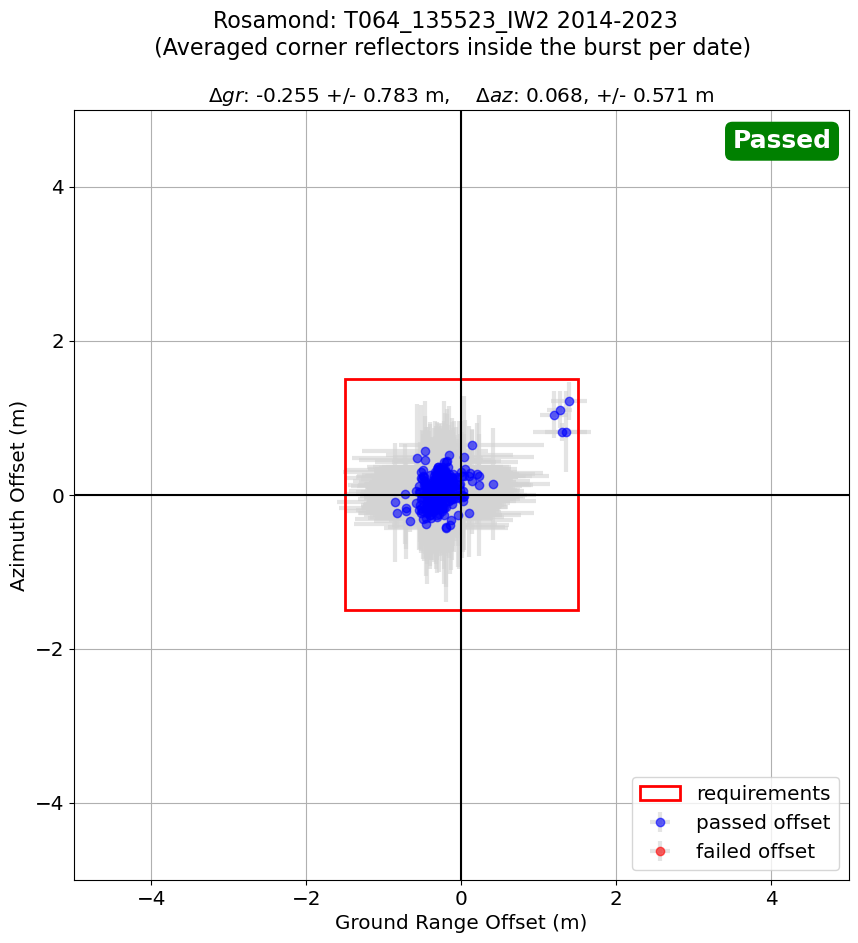

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10),sharex=True)
ale_req = patches.Rectangle((-1.5, 1.5), 3, -3, linewidth=2, edgecolor='r', facecolor='none',label='requirements')  #OPERA ALE requirements
ax.errorbar(df['GRg_avg'][rg_bool_pass & az_bool_pass],df['Az_avg'][rg_bool_pass & az_bool_pass],xerr=df['GRg_std'][rg_bool_pass & az_bool_pass],yerr=df['Az_std'][rg_bool_pass & az_bool_pass],marker='o',color='b',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, alpha=0.6, zorder=0,label='passed offset')
ax.errorbar(df['GRg_avg'][~rg_bool_pass | ~az_bool_pass],df['Az_avg'][~rg_bool_pass | ~az_bool_pass],xerr=df['GRg_std'][~rg_bool_pass | ~az_bool_pass],yerr=df['Az_std'][~rg_bool_pass | ~az_bool_pass],marker='o',color='r',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, alpha=0.6, zorder=0,label='failed offset')
if rg_pass_or_not and az_pass_or_not:
   ax.text(0.85,0.95,'Passed',color='w',size=18,weight='bold',transform = ax.transAxes,bbox=dict(facecolor='green',boxstyle='round',edgecolor='none'))
else:
   ax.text(0.85,0.95,'Failed',color='w',size=18,weight='bold',transform = ax.transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title(f'$\Delta gr$: {np.round(df.GRg_avg.mean(),3)} +/- {np.round(df.GRg_std.mean(),3)} m, \
   $\Delta az$: {np.round(df.Az_avg.mean(),3)}, +/- {np.round(df.Az_std.mean(),3)} m')
ax.set_xlabel('Ground Range Offset (m)')
ax.set_ylabel('Azimuth Offset (m)')
nl = '\n'
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (Averaged corner reflectors inside the burst per date)", fontsize=16)
ax.add_patch(ale_req)
ax.legend(loc = 'lower right',frameon=True)
fig.savefig(f'{save_dir}/pngs/ALE_summary_{cr_network}_{burst_id.upper()}_grazi_mean.png',dpi=300,bbox_inches='tight')

In [11]:
# Save the ALE Summary Rating as CSV
summary_df = pd.DataFrame()

if rg_pass_or_not and az_pass_or_not:
    rating = 'PASS'
else:
    rating = 'FAIL'

summary = []
summary.append([burst_id.upper(), cr_network, rating, np.round(df.GRg_avg.mean(),3), np.round(df.GRg_std.mean(),3), np.round(df.Az_avg.mean(),3), np.round(df.Az_std.mean(),3)])
summary_df = pd.DataFrame(summary)
ALE_rootdir = os.path.abspath(os.path.join(save_dir ,"../.."))
summary_df.to_csv(f'{ALE_rootdir}/ALE_summary.csv', mode='a', header=False, index=False)

## 2. Plot <span style="color:red">ALL</span> the corner reflectors for a given `burst_id` from `2014-2023`

In [12]:
df = pd.read_csv(f'{save_dir}/summary/{outcsv2}', sep=',')
del df[df.columns[0]]
df.columns = ['ID','lat','lon','hgt','azm','tilt','slen','UTMx','UTMy','xloc','yloc','xloc_subpx','yloc_subpx','xloc_peak','yloc_peak','snr','azi_angle','inc_angle','ALE_EW','ALE_NS','ALE_GRg','ALE_Az','Date']
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df.head()

,ID,lat,lon,hgt,azm,tilt,slen,UTMx,UTMy,xloc,...,xloc_peak,yloc_peak,snr,azi_angle,inc_angle,ALE_EW,ALE_NS,ALE_GRg,ALE_Az,Date
0,2,34.805237,-118.087457,660.8836,170.00,9.57,2.4,400531.064893,3.851984e+06,1655,...,1655.825423,3037.161422,15.381387,-0.584727,-0.107741,0.562222,0.347959,-0.615967,0.240319,2015-07-01
1,4,34.805415,-118.076376,661.1403,174.00,12.48,2.4,401544.932855,3.851993e+06,1858,...,1858.849738,3036.289475,15.026534,-0.585616,-0.107838,1.815833,0.454098,-1.868045,0.117744,2015-07-01
2,5,34.805493,-118.070801,661.2299,173.17,9.09,2.4,402054.963397,3.851996e+06,1960,...,1960.701486,3035.972342,15.236935,-0.586062,-0.107886,1.044034,0.508284,-1.118803,0.310869,2015-07-01
3,8,34.805751,-118.054071,661.4565,172.83,9.84,2.4,403585.600668,3.852008e+06,2266,...,2266.820317,3034.660564,15.600237,-0.587395,-0.108029,1.000919,-0.157948,-0.955840,-0.336388,2015-07-01
4,9,34.805813,-118.048913,661.4505,175.12,10.24,2.4,404057.471516,3.852010e+06,2360,...,2361.099524,3034.484375,15.214200,-0.587803,-0.108073,0.526106,0.020906,-0.521213,-0.074573,2015-07-01


In [13]:
# Evaluate if the point is passing the requirement or not
rg_bool_pass, rg_pass_rate, rg_pass_or_not = if_pass(df['ALE_GRg'],1.5)
az_bool_pass, az_pass_rate, az_pass_or_not = if_pass(df['ALE_Az'],1.5)

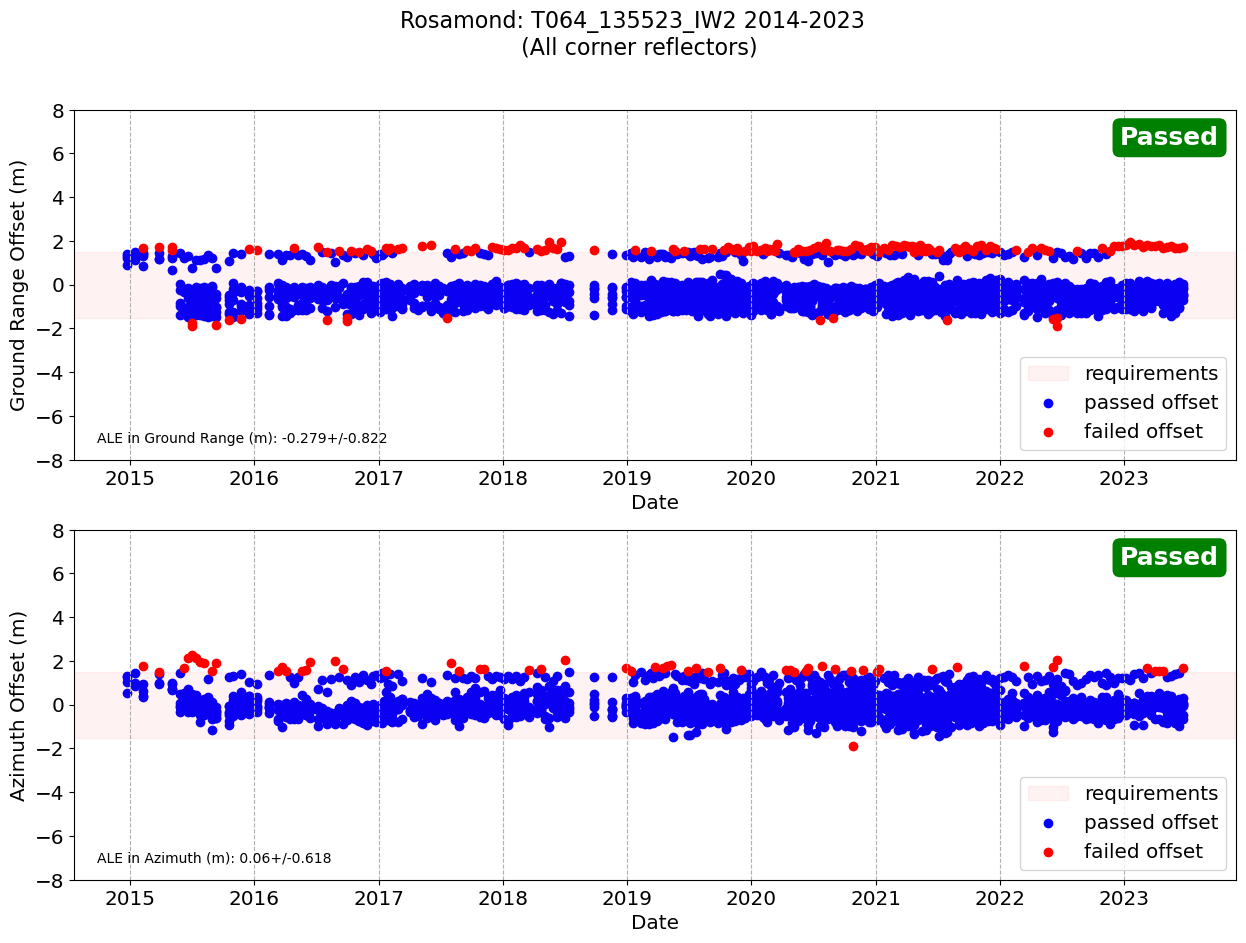

In [14]:
# Plot results
fig, ax = plt.subplots(2,1,figsize=(15,10))

gr_req = ax[0].axhspan(-1.5,1.5,color='red', alpha=0.05, zorder=1, label='requirements')
ax[0].scatter(df['Date'][rg_bool_pass],df['ALE_GRg'][rg_bool_pass],marker='o',color='b',zorder=0, label='passed offset')
ax[0].scatter(df['Date'][~rg_bool_pass],df['ALE_GRg'][~rg_bool_pass],marker='o',color='r',zorder=0, label='failed offset')
ax[0].set_xlabel('Date')
ax[0].set_ylim(-8,8)
ax[0].grid(axis='x',linestyle='--')
ax[0].set_ylabel('Ground Range Offset (m)')
ax[0].legend(loc='lower right')
if rg_pass_or_not:
    ax[0].text(0.90,0.90,'Passed',color='w',size=18,weight='bold',transform = ax[0].transAxes,bbox=dict(facecolor='green',boxstyle='round',edgecolor='none'))
else:
    ax[0].text(0.90,0.90,'Failed',color='w',size=18,weight='bold',transform = ax[0].transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax[0].legend(loc = 'lower right',frameon=True)
ax[0].text(0.02,0.05,f'ALE in Ground Range (m): {np.round(df["ALE_GRg"].mean(),3)}+/-{np.round(df["ALE_GRg"].std(),3)}',transform = ax[0].transAxes)
az_req = ax[1].axhspan(-1.5,1.5,color='red', alpha=0.05, zorder=1, label='requirements')
ax[1].scatter(df['Date'][az_bool_pass],df['ALE_Az'][az_bool_pass],marker='o',color='b',zorder=0, label='passed offset')
ax[1].scatter(df['Date'][~az_bool_pass],df['ALE_Az'][~az_bool_pass],marker='o',color='r',zorder=0,label='failed offset')
ax[1].set_xlabel('Date')
ax[1].set_ylim(-8,8)
ax[1].grid(axis='x',linestyle='--')
ax[1].set_ylabel('Azimuth Offset (m)')
ax[1].legend(loc='lower right')
if az_pass_or_not:
    ax[1].text(0.90,0.90,'Passed',color='w',size=18,weight='bold',transform = ax[1].transAxes,bbox=dict(facecolor='green',boxstyle='round',edgecolor='none'))
else:
    ax[1].text(0.90,0.90,'Failed',color='w',size=18,weight='bold',transform = ax[1].transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax[1].text(0.02,0.05,f'ALE in Azimuth (m): {np.round(df["ALE_Az"].mean(),3)}+/-{np.round(df["ALE_Az"].std(),3)}',transform = ax[1].transAxes)
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (All corner reflectors)", fontsize=16)
fig.savefig(f'{save_dir}/pngs/ALE_summary_{cr_network}_{burst_id.upper()}_ts_grazi_all.png',dpi=300,bbox_inches='tight')

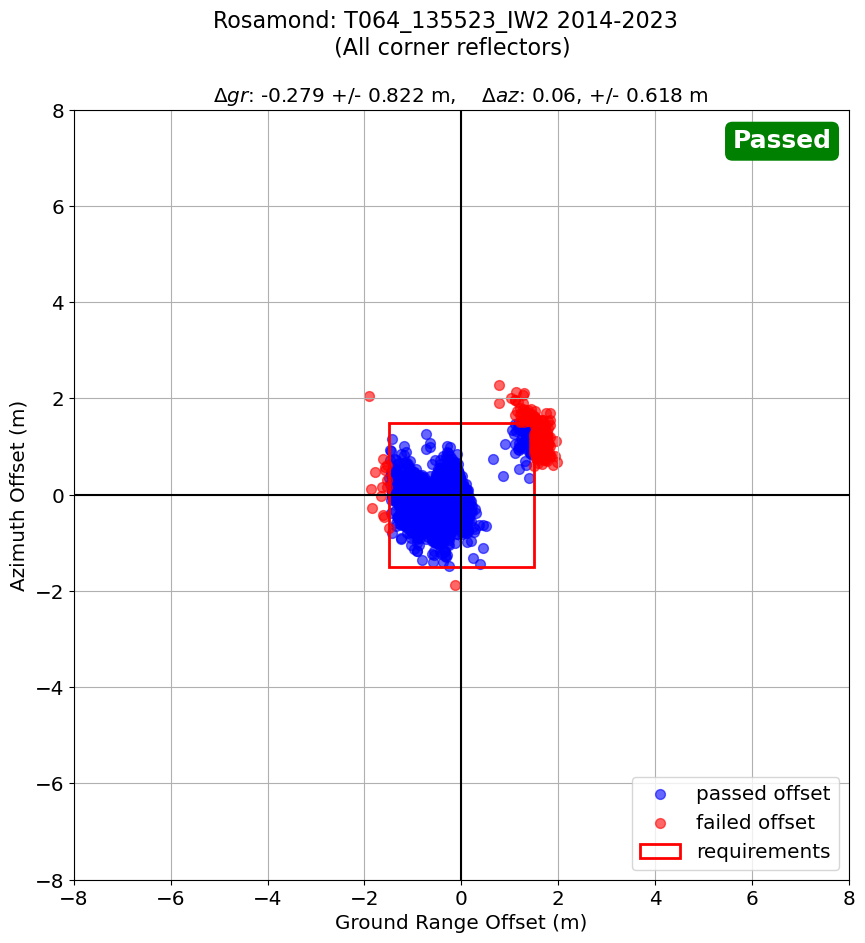

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
rect = patches.Rectangle((-1.5, 1.5), 3, -3, linewidth=2, edgecolor='r', facecolor='none', label='requirements')  #OPERA ALE requirements
ax.scatter(df['ALE_GRg'][rg_bool_pass & az_bool_pass], df['ALE_Az'][rg_bool_pass & az_bool_pass], s=50, alpha=0.6, color='b', zorder=0, label='passed offset')
ax.scatter(df['ALE_GRg'][~rg_bool_pass | ~az_bool_pass], df['ALE_Az'][~rg_bool_pass | ~az_bool_pass], s=50, alpha=0.6, color='r', zorder=0, label='failed offset')
if rg_pass_or_not and az_pass_or_not:
   ax.text(0.85,0.95,'Passed',color='w',size=18,weight='bold',transform = ax.transAxes,bbox=dict(facecolor='green',boxstyle='round',edgecolor='none'))
else:
   ax.text(0.85,0.95,'Failed',color='w',size=18,weight='bold',transform = ax.transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax.grid(True)
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title(f'$\Delta gr$: {np.round(df["ALE_GRg"].mean(),3)} +/- {np.round(df["ALE_GRg"].std(),3)} m, \
   $\Delta az$: {np.round(df["ALE_Az"].mean(),3)}, +/- {np.round(df["ALE_Az"].std(),3)} m')
ax.set_xlabel('Ground Range Offset (m)')
ax.set_ylabel('Azimuth Offset (m)')
ax.add_patch(rect)
ax.legend(loc = 'lower right',frameon=True)
nl = '\n'
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (All corner reflectors)", fontsize=16)
fig.savefig(f'{save_dir}/pngs/ALE_summary_{cr_network}_{burst_id.upper()}_grazi_all.png',dpi=300,bbox_inches='tight')